In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import category_encoders as ce



In [3]:


path = os.path.dirname(os.getcwd()) + '\\data\\'
print(f"CWD:{path}")
csv_files = glob.glob(os.path.join(path, "*.csv"))


# for f in csv_files:
#     filename = f.split('\\')[-1]
#     print(f"File detected:{filename}")
#     single_df = pd.read_csv(f)
    

df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
    

print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

df.info()

#Lets look into top few rows and columns in the dataset
df.head()
display(df)


CWD:C:\Users\Dreamcore\Desktop\work\INF1002 programming fundamentals\project\data\

Number of rows and columns in the data set:  (881884, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881884 entries, 0 to 881883
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                881884 non-null  object 
 1   town                 881884 non-null  object 
 2   flat_type            881884 non-null  object 
 3   block                881884 non-null  object 
 4   street_name          881884 non-null  object 
 5   storey_range         881884 non-null  object 
 6   floor_area_sqm       881884 non-null  float64
 7   flat_model           881884 non-null  object 
 8   lease_commence_date  881884 non-null  int64  
 9   resale_price         881884 non-null  float64
 10  remaining_lease      172834 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 74.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
881879,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
881880,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
881881,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
881882,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [31]:
# preview data

blacklisted_columns = ["street_name"]

for column in df:
    if column not in blacklisted_columns:
        print(f"\n\nUNIQUE VALUES: {column}\nVALUES:{len(df[column].unique())}")
        print(df[column].unique())





UNIQUE VALUES: month
VALUES:393
[726468 726499 726527 726558 726588 726619 726649 726680 726711 726741
 726772 726802 726833 726864 726892 726923 726953 726984 727014 727045
 727076 727106 727137 727167 727198 727229 727258 727289 727319 727350
 727380 727411 727442 727472 727503 727533 727564 727595 727623 727654
 727684 727715 727745 727776 727807 727837 727868 727898 727929 727960
 727988 728019 728049 728080 728110 728141 728172 728202 728233 728263
 728294 728325 728353 728384 728414 728445 728475 728506 728537 728567
 728598 728628 728659 728690 728719 728750 728780 728811 728841 728872
 728903 728933 728964 728994 729025 729056 729084 729115 729145 729176
 729206 729237 729268 729298 729329 729359 729390 729421 729449 729480
 729510 729541 729571 729602 729633 729663 729694 729724 729755 729786
 729814 729845 729875 729906 729936 729967 729998 730028 730059 730089
 730120 730151 730180 730211 730241 730272 730302 730333 730364 730394
 730425 730455 730486 730517 730545 730576 

In [10]:
e = df[df['month'] >= "2017-01"]

e.info()

# #Lets look into top few rows and columns in the dataset
e.head()
print(len(e))
# display(e)

# print(len(df[(df['month'] > "2022-09")]))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135681 entries, 694000 to 829680
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                135681 non-null  object 
 1   town                 135681 non-null  object 
 2   flat_type            135681 non-null  object 
 3   block                135681 non-null  object 
 4   street_name          135681 non-null  object 
 5   storey_range         135681 non-null  object 
 6   floor_area_sqm       135681 non-null  float64
 7   flat_model           135681 non-null  object 
 8   lease_commence_date  135681 non-null  int64  
 9   resale_price         135681 non-null  float64
 10  remaining_lease      135681 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.4+ MB
135681


In [4]:
# to standardise data
# KIV, current looping is  likely not the most efficient option

# flat type names set to be consistent 
df.loc[df['flat_type'] == "MULTI GENERATION", 'flat_type'] = "MULTI-GENERATION"
df['flat_model'] = df['flat_model'].str.upper()

middle_floor_value = lambda min_floor_str, max_floor_str : int((int(max_floor_str) + int(min_floor_str)) / 2)

for index, row in df.iterrows():
    
    if "year" in str(row['remaining_lease']):
        # if remaining_lease contains words
        remaining_lease_text_list = row["remaining_lease"].split(" ") # split x years y months to ["x", "years", "y", "months"]
        lease_duration_left = int(remaining_lease_text_list[0])

        if len(remaining_lease_text_list) == 4 and "month" in remaining_lease_text_list[3]:  # if a month value is detected in the row
            if int(remaining_lease_text_list[2]) > 7:
                lease_duration_left += 1
        df.at[index,'remaining_lease'] = lease_duration_left
        
    elif pd.isnull(row['remaining_lease']):
        # take lease commence date + 99 years, then take the result year and deduct by current year
        lease_end_year  = int(row["lease_commence_date"]) + 99
        year_month_pair = row["month"].split("-")
        current_year = int(year_month_pair[0]) + int(int(year_month_pair[1]) > 7) # if the current date is 2nd half of the year,  we round the year number up by 1
        lease_duration_left = lease_end_year - current_year
        df.at[index,'remaining_lease'] = lease_duration_left
    
    if "TO" in row["storey_range"]:
        # convert storey_range from e.g. 3 TO 5 to e.g. 4
        storey_range_min_max = row["storey_range"].split("TO")
        mid_floor_value = middle_floor_value(storey_range_min_max[0], storey_range_min_max[1])
        df.at[index,'storey_range'] = mid_floor_value
        
    
# now that month has been used to calculate remaining lease, we convert the month into a format that the 
# regression model understands
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].map(dt.datetime.toordinal)



# set remaining_lease values for records 2017 or later, as they are in the format of x years +-(y months)
# for index, row in df.loc["year" in df['remaining_lease']].iterrows():
#     remaining_lease_text_list = row["remaining_lease"].split(" ") # split x years y months to ["x", "years", "y", "months"]
#     lease_duration_left = int(remaining_lease_text_list[0])
    
#     if len(remaining_lease_text_list) == 4 and "month" in remaining_lease_text_list[3]:  # if a month value is detected in the row
#         if int(remaining_lease_text_list[2]) > 7:
#             lease_duration_left += 1
#     df.at[index,'remaining_lease'] = lease_duration_left

# for column in df:
#     if column not in blacklisted_columns:
#         print(f"\n\nUNIQUE VALUES: {column}\nVALUES:{len(df[column].unique())}")
#         print(df[column].unique())


In [1]:
new_df = df.loc[df["flat_type"] == "1 ROOM"]
print(new_df.head(5))

NameError: name 'df' is not defined

In [12]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,IMPROVED,1977,9000.0,86
1,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,5,31.0,IMPROVED,1977,6000.0,86
2,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,IMPROVED,1977,8000.0,86
3,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,8,31.0,IMPROVED,1977,6000.0,86
4,726468,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,5,73.0,NEW GENERATION,1976,47200.0,85


In [13]:
df.to_csv('out.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881884 entries, 0 to 881883
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                881884 non-null  int64  
 1   town                 881884 non-null  object 
 2   flat_type            881884 non-null  object 
 3   block                881884 non-null  object 
 4   street_name          881884 non-null  object 
 5   storey_range         881884 non-null  int64  
 6   floor_area_sqm       881884 non-null  float64
 7   flat_model           881884 non-null  object 
 8   lease_commence_date  881884 non-null  int64  
 9   resale_price         881884 non-null  float64
 10  remaining_lease      881884 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 74.0+ MB


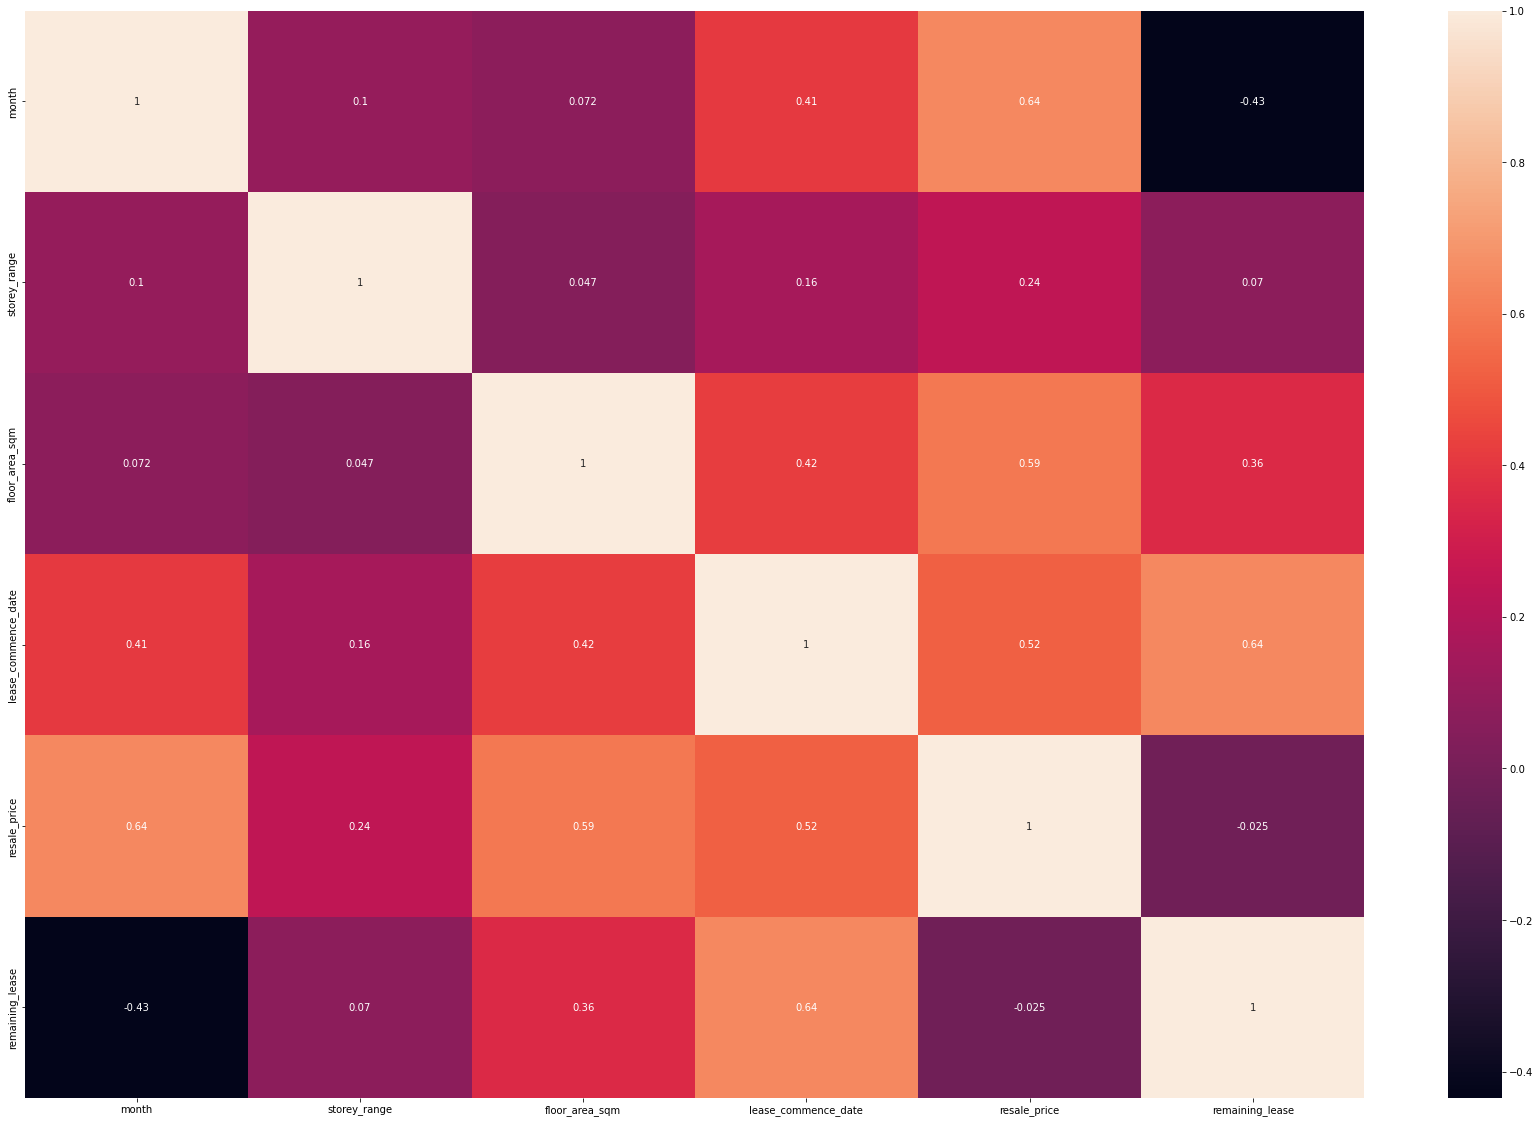

In [15]:
# data visualisation

df = df.astype({'remaining_lease': 'int64'})
df = df.astype({'storey_range': 'int64'})

# in a heatmap, the closer the value is to 1, the more positively correlated they are
# (if one value increases, so does the other)
fig,ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df.corr(),annot=True,ax=ax)

df.info()

In [6]:
# encode cetegorical data: town, flat type and flat model



# either binary or base-n, depending on how many extra columns you need to show categorical data
encode_columns = ['town', 'flat_type', 'flat_model']
data_encoder = ce.BinaryEncoder(cols=encode_columns) 

# ce_town = ce.BinaryEncoder(cols=['town']) 
# ce_flat_type = ce.BinaryEncoder(cols=['flat_type']) 
# ce_flat_model = ce.BinaryEncoder(cols=['flat_model']) 
# transformed_df = ce_town.fit_transform(df)
# transformed_df = ce_flat_type.fit_transform(transformed_df)
# transformed_df = ce_flat_model.fit_transform(transformed_df)

transformed_df = data_encoder.fit_transform(df)

df.head(5)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,IMPROVED,1977,9000.0,86
1,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,5,31.0,IMPROVED,1977,6000.0,86
2,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,IMPROVED,1977,8000.0,86
3,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,8,31.0,IMPROVED,1977,6000.0,86
4,726468,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,5,73.0,NEW GENERATION,1976,47200.0,85


    month  town_0  town_1  town_2  town_3  town_4  flat_type_0  flat_type_1  \
0  726468       0       0       0       0       1            0            0   
1  726468       0       0       0       0       1            0            0   
2  726468       0       0       0       0       1            0            0   
3  726468       0       0       0       0       1            0            0   
4  726468       0       0       0       0       1            0            1   

   flat_type_2 block  ... storey_range floor_area_sqm  flat_model_0  \
0            1   309  ...           11           31.0             0   
1            1   309  ...            5           31.0             0   
2            1   309  ...           11           31.0             0   
3            1   309  ...            8           31.0             0   
4            0   216  ...            5           73.0             0   

   flat_model_1  flat_model_2  flat_model_3  flat_model_4  \
0             0             0        

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_5804\2859163624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.sort_values(by=['month'], inplace=True)
C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_5804\2859163624.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month'] = new_df['month'].map(dt.datetime.fromordinal)


          month  resale_price
0    1990-01-01        9000.0
1010 1990-01-01       31400.0
1009 1990-01-01       66500.0
1008 1990-01-01       77000.0
1007 1990-01-01       58000.0
            month  resale_price
828899 2022-09-01      410000.0
828898 2022-09-01      440000.0
828897 2022-09-01      476000.0
828913 2022-09-01      708000.0
829679 2022-09-01      798000.0
1418000.0
Figure(1058.4x739.44)


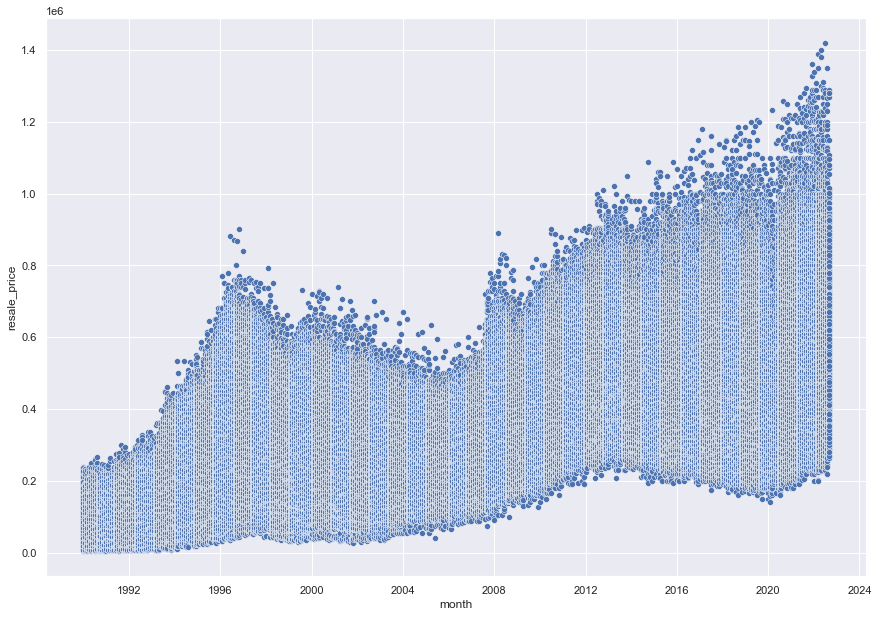

In [21]:
x = transformed_df.loc[:,'month']
y = transformed_df.loc[:,'resale_price']
print(transformed_df.head())
new_df = transformed_df[['month', 'resale_price']]
new_df.sort_values(by=['month'], inplace=True)

new_df['month'] = new_df['month'].map(dt.datetime.fromordinal)
# x = new_df["month"]
# x = x.map(dt.datetime.fromordinal)
# result_x = list(map(str, x))
# print("date")
# print(x[-5:])

# print(type(x))
# print(type(y))
# x = x.map(dt.datetime.fromordinal)
# print(x)
print(new_df.head())
print(new_df.tail())
print(new_df['resale_price'].max())

ax = sns.scatterplot(data=new_df, x="month", y="resale_price")
print(ax.figure)
# min_resale_price = df['resale_price'].min()
# max_resale_price = df['resale_price'].max()

# print(min_resale_price, max_resale_price)
# sns.set(rc={'figure.figsize':(14.7,10.27)})
# ax = sns.scatterplot(data=transformed_df, x="month", y="resale_price")
# new_x = x.tolist()
# # ax.set_xticklabels(x.tolist())
# print(ax.figure)

In [7]:
# #standardise remaining_lease value
# for index, row in df.loc[df['remaining_lease'].isna()].iterrows():
#     # take lease commence date + 99 years, then take the result year and deduct by current year
    
#     current_year_month = row["month"].split("-")
#     print(current_year_month)
#     break
for column in transformed_df:
    if column not in blacklisted_columns:
        print(f"\n\nUNIQUE VALUES: {column}\nVALUES:{len(transformed_df[column].unique())}")
        print(transformed_df[column].unique())
transformed_df.info()
display(transformed_df[['month','block', 'street_name', 'storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease']])



UNIQUE VALUES: month
VALUES:393
[726468 726499 726527 726558 726588 726619 726649 726680 726711 726741
 726772 726802 726833 726864 726892 726923 726953 726984 727014 727045
 727076 727106 727137 727167 727198 727229 727258 727289 727319 727350
 727380 727411 727442 727472 727503 727533 727564 727595 727623 727654
 727684 727715 727745 727776 727807 727837 727868 727898 727929 727960
 727988 728019 728049 728080 728110 728141 728172 728202 728233 728263
 728294 728325 728353 728384 728414 728445 728475 728506 728537 728567
 728598 728628 728659 728690 728719 728750 728780 728811 728841 728872
 728903 728933 728964 728994 729025 729056 729084 729115 729145 729176
 729206 729237 729268 729298 729329 729359 729390 729421 729449 729480
 729510 729541 729571 729602 729633 729663 729694 729724 729755 729786
 729814 729845 729875 729906 729936 729967 729998 730028 730059 730089
 730120 730151 730180 730211 730241 730272 730302 730333 730364 730394
 730425 730455 730486 730517 730545 730576 

,month,block,street_name,storey_range,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
0,726468,309,ANG MO KIO AVE 1,11,31.0,1977,9000.0,86
1,726468,309,ANG MO KIO AVE 1,5,31.0,1977,6000.0,86
2,726468,309,ANG MO KIO AVE 1,11,31.0,1977,8000.0,86
3,726468,309,ANG MO KIO AVE 1,8,31.0,1977,6000.0,86
4,726468,216,ANG MO KIO AVE 1,5,73.0,1976,47200.0,85
...,...,...,...,...,...,...,...,...
881879,735568,816,YISHUN ST 81,11,122.0,1988,580000.0,72
881880,735568,325,YISHUN CTRL,11,146.0,1988,540000.0,72
881881,735568,618,YISHUN RING RD,8,164.0,1992,738000.0,76
881882,735568,277,YISHUN ST 22,8,152.0,1985,592000.0,69


In [22]:
# the hail mary: removing a column
# removing street name and block, as the ML model will use the town column as the address category 
# maybe removing month? idk man

columns_to_remove = ['street_name', 'block']

for col in columns_to_remove:
    if col in transformed_df.columns:
        transformed_df = transformed_df.drop(col, axis=1)
    else:
        print(f"'{col}' column not found. skipping...")

In [9]:
# todo list:

# see if you can convert block number ad street name to geolocation. if not, just take out the letter suffixes

# apply categorical data endocing to town, flat type and flat model. 
# not sure what to do with street name

In [23]:
display(transformed_df)

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,resale_price,remaining_lease
0,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,9000.0,86
1,726468,0,0,0,0,1,0,0,1,5,31.0,0,0,0,0,1,1977,6000.0,86
2,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,8000.0,86
3,726468,0,0,0,0,1,0,0,1,8,31.0,0,0,0,0,1,1977,6000.0,86
4,726468,0,0,0,0,1,0,1,0,5,73.0,0,0,0,1,0,1976,47200.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881879,735568,1,0,1,1,0,1,0,0,11,122.0,0,0,0,0,1,1988,580000.0,72
881880,735568,1,0,1,1,0,1,1,0,11,146.0,0,1,0,0,0,1988,540000.0,72
881881,735568,1,0,1,1,0,1,1,0,8,164.0,0,0,1,1,1,1992,738000.0,76
881882,735568,1,0,1,1,0,1,1,0,8,152.0,0,1,0,0,0,1985,592000.0,69


In [24]:

cols = list(transformed_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('resale_price'))
transformed_df = transformed_df[cols+['resale_price']] #Create new dataframe with columns in the order you want


x = transformed_df.iloc[:,0:-1]  # contains all independent variables required for the model to derive the resale price
y = transformed_df.iloc[:,-1] # series object containing all resale price data

x.info()
display(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881884 entries, 0 to 881883
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                881884 non-null  int64  
 1   town_0               881884 non-null  int64  
 2   town_1               881884 non-null  int64  
 3   town_2               881884 non-null  int64  
 4   town_3               881884 non-null  int64  
 5   town_4               881884 non-null  int64  
 6   flat_type_0          881884 non-null  int64  
 7   flat_type_1          881884 non-null  int64  
 8   flat_type_2          881884 non-null  int64  
 9   storey_range         881884 non-null  object 
 10  floor_area_sqm       881884 non-null  float64
 11  flat_model_0         881884 non-null  int64  
 12  flat_model_1         881884 non-null  int64  
 13  flat_model_2         881884 non-null  int64  
 14  flat_model_3         881884 non-null  int64  
 15  flat_model_4     

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,remaining_lease
0,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86
1,726468,0,0,0,0,1,0,0,1,5,31.0,0,0,0,0,1,1977,86
2,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86
3,726468,0,0,0,0,1,0,0,1,8,31.0,0,0,0,0,1,1977,86
4,726468,0,0,0,0,1,0,1,0,5,73.0,0,0,0,1,0,1976,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881879,735568,1,0,1,1,0,1,0,0,11,122.0,0,0,0,0,1,1988,72
881880,735568,1,0,1,1,0,1,1,0,11,146.0,0,1,0,0,0,1988,72
881881,735568,1,0,1,1,0,1,1,0,8,164.0,0,0,1,1,1,1992,76
881882,735568,1,0,1,1,0,1,1,0,8,152.0,0,1,0,0,0,1985,69


In [48]:
y.info()
display(y)

<class 'pandas.core.series.Series'>
RangeIndex: 881884 entries, 0 to 881883
Series name: resale_price
Non-Null Count   Dtype  
--------------   -----  
881884 non-null  float64
dtypes: float64(1)
memory usage: 6.7 MB


0           9000.0
1           6000.0
2           8000.0
3           6000.0
4          47200.0
            ...   
881879    580000.0
881880    540000.0
881881    738000.0
881882    592000.0
881883    545000.0
Name: resale_price, Length: 881884, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

naive_linear_reg = LinearRegression()
naive_linear_reg.fit(x_train,y_train)

predicted_result = naive_linear_reg.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

print("LINEAR REGRESSION RESULTS")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predicted_result)))
print("R2: ",r2_score(y_test,predicted_result))


poly_features = preprocessing.PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.4)

polynomial_regression = LinearRegression(fit_intercept=True, n_jobs=1)

polynomial_regression.fit(x_train,y_train) # fit sample values to sample answers

predicted_result = polynomial_regression.predict(x_test)
print("POLYNOMIAL REGRESSION RESULTS")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predicted_result)))
print("R2: ",r2_score(y_test,predicted_result))

LINEAR REGRESSION RESULTS
RMSE:  77890.38127992897
R2:  0.7617899400719206
POLYNOMIAL REGRESSION RESULTS
RMSE:  65177.69698989094
R2:  0.8336580611443621


In [84]:
display(predicted_result)

array([338281.31517658, 293869.70076618, 271739.98839435, ...,
       149833.90123615, 250579.40095386, 165362.86476764])

In [89]:
display(x_poly)

array([[1.00000000e+00, 7.26468000e+05, 0.00000000e+00, ...,
        3.36133494e+08, 1.46218920e+07, 6.36056000e+05],
       [1.00000000e+00, 7.26468000e+05, 0.00000000e+00, ...,
        3.36133494e+08, 1.46218920e+07, 6.36056000e+05],
       [1.00000000e+00, 7.26468000e+05, 0.00000000e+00, ...,
        3.36133494e+08, 1.46218920e+07, 6.36056000e+05],
       ...,
       [1.00000000e+00, 7.35568000e+05, 1.00000000e+00, ...,
        3.01572864e+08, 1.15057920e+07, 4.38976000e+05],
       [1.00000000e+00, 7.35568000e+05, 1.00000000e+00, ...,
        2.71875525e+08, 9.45058500e+06, 3.28509000e+05],
       [1.00000000e+00, 7.35568000e+05, 1.00000000e+00, ...,
        2.71875525e+08, 9.45058500e+06, 3.28509000e+05]])

In [85]:
df.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,IMPROVED,1977,9000.0,86


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881884 entries, 0 to 881883
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                881884 non-null  int64  
 1   town                 881884 non-null  object 
 2   flat_type            881884 non-null  object 
 3   block                881884 non-null  object 
 4   street_name          881884 non-null  object 
 5   storey_range         881884 non-null  int64  
 6   floor_area_sqm       881884 non-null  float64
 7   flat_model           881884 non-null  object 
 8   lease_commence_date  881884 non-null  int64  
 9   resale_price         881884 non-null  float64
 10  remaining_lease      881884 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 74.0+ MB


In [159]:
# ce_town = ce.BinaryEncoder(cols=['town']) 
# ce_flat_type = ce.BinaryEncoder(cols=['flat_type']) 
# ce_flat_model = ce.BinaryEncoder(cols=['flat_model']) 
data_encoder_params = data_encoder.get_params()
print(data_encoder_params["cols"])
mapping_df = [m["mapping"] for m in data_encoder_params["mapping"] if m['col'] == "flat_model"][0]
print(type(mapping_df))
mapping_df.head(5)
#data_encoder.get_params()

['town', 'flat_type', 'flat_model']
<class 'pandas.core.frame.DataFrame'>


,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,1
4,0,0,1,0,0
5,0,0,1,0,1


In [102]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [105]:
dfx = transformed_df.drop_duplicates(subset=["flat_model_0", "flat_model_1", 
                                             "flat_model_2", "flat_model_3", 
                                             "flat_model_4"], keep="first")
display(dfx)

dfx2 = df.drop_duplicates(subset=["flat_model"], keep="first")
display(dfx2)

,month,town_0,town_1,town_2,town_3,town_4,flat_type_0,flat_type_1,flat_type_2,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,remaining_lease,resale_price
0,726468,0,0,0,0,1,0,0,1,11,31.0,0,0,0,0,1,1977,86,9000.0
4,726468,0,0,0,0,1,0,1,0,5,73.0,0,0,0,1,0,1976,85,47200.0
149,726468,0,0,0,0,1,1,0,0,17,135.0,0,0,0,1,1,1982,91,200000.0
150,726468,0,0,0,0,1,1,0,0,8,117.0,0,0,1,0,0,1978,87,118000.0
309,726468,0,0,0,1,0,0,1,1,11,83.0,0,0,1,0,1,1985,94,72000.0
322,726468,0,0,0,1,0,1,0,0,8,139.0,0,0,1,1,0,1984,93,170000.0
333,726468,0,0,0,1,0,1,1,0,8,143.0,0,0,1,1,1,1984,93,200000.0
334,726468,0,0,0,1,0,1,1,0,2,151.0,0,1,0,0,0,1984,93,195000.0
1013,726468,0,1,1,1,0,0,1,0,2,83.0,0,1,0,0,1,1972,81,53000.0
2321,726499,1,0,1,0,0,1,0,1,5,40.0,0,1,0,1,0,1968,77,17000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,726468,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,IMPROVED,1977,9000.0,86
4,726468,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,5,73.0,NEW GENERATION,1976,47200.0,85
149,726468,ANG MO KIO,5 ROOM,259,ANG MO KIO AVE 2,17,135.0,MODEL A,1982,200000.0,91
150,726468,ANG MO KIO,5 ROOM,101,ANG MO KIO AVE 3,8,117.0,STANDARD,1978,118000.0,87
309,726468,BEDOK,4 ROOM,165,BEDOK STH RD,11,83.0,SIMPLIFIED,1985,72000.0,94
322,726468,BEDOK,5 ROOM,722,BEDOK RESERVOIR RD,8,139.0,MODEL A-MAISONETTE,1984,170000.0,93
333,726468,BEDOK,EXECUTIVE,716,BEDOK RESERVOIR RD,8,143.0,APARTMENT,1984,200000.0,93
334,726468,BEDOK,EXECUTIVE,725,BEDOK RESERVOIR RD,2,151.0,MAISONETTE,1984,195000.0,93
1013,726468,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,2,83.0,TERRACE,1972,53000.0,81
2321,726499,TOA PAYOH,2 ROOM,120,LOR 2 TOA PAYOH,5,40.0,2-ROOM,1968,17000.0,77


In [111]:
print(ce_flat_model.get_params()["mapping"][0]["mapping"])

     flat_model_0  flat_model_1  flat_model_2  flat_model_3  flat_model_4
 1              0             0             0             0             1
 2              0             0             0             1             0
 3              0             0             0             1             1
 4              0             0             1             0             0
 5              0             0             1             0             1
 6              0             0             1             1             0
 7              0             0             1             1             1
 8              0             1             0             0             0
 9              0             1             0             0             1
 10             0             1             0             1             0
 11             0             1             0             1             1
 12             0             1             1             0             0
 13             0             1       

In [128]:
# we have learnt that category encoders comes up with a unique value for every first occurrence of
# a unique label

# doing df.drop_duplicates(subset=["flat_model"], keep="first"), then getting the index list 
# and matching it with the index of ce_flat_model.get_params()["mapping"][0]["mapping"] should result 
# in a properly formed mapping table
unique_values = df['flat_model'].unique()
print(dfx2['flat_model'].tolist())
print(list(df['flat_model'].unique()))

print(len(df['flat_model'].unique()))
encoded_values = ce_flat_model.get_params()["mapping"][0]["mapping"]
output_dict = {}
counter = 0
for model in unique_values:
    output_dict[model] = encoded_values.iloc[counter].values.tolist()
    counter += 1
print(output_dict)
    

['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION', 'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE', 'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT', '3GEN']
['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION', 'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE', 'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT', '3GEN']
21
{'IMPROVED': [0, 0, 0, 0, 1], 'NEW GENERATION': [0, 0, 0, 1, 0], 'MODEL A': [0, 0, 0, 1, 1], 'STANDARD': [0, 0, 1, 0, 0], 'SIMPLIFIED': [0, 0, 1, 0, 1], 'MODEL A-MAISONETTE': [0, 0, 1, 1, 0], 'APARTMENT': [0, 0, 1, 1, 1], 'MAISONETTE': [0, 1, 0, 0, 0], 'TERRACE': [0, 1, 0, 0, 1], '2-ROOM': [0, 1, 0, 1, 0], 'IMPROVED-MAISONETTE': [0, 1, 0, 1, 1], 'MULTI GENERATI

In [140]:
test_data = [{
        "month" : "2019-05",
        "town": "ANG MO KIO",
        "flat_type": "5 ROOM",
        "block": "351",
        "street_name": "ANG MO KIO ST 32",
        "storey_range": "13 TO 15",
        "floor_area_sqm": "110",
        "flat_model": "MULTI GENERATION",
        "lease_commence_date": "2001",
        "remaining_lease": "81 years 04 months"
    }]

test_df = pd.DataFrame(test_data)
display(test_df)
value_to_change = test_df.iloc[0]["flat_model"]

print(value_to_change)

test_df.columns.get_loc('flat_model')

counter = 0
for encoder_column in output_dict[value_to_change]:
    test_df.insert(test_df.columns.get_loc('flat_model'), f'flat_model_{counter}', encoder_column)
    counter += 1

test_df = test_df.drop(columns=['flat_model'])
display(test_df)



,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease
0,2019-05,ANG MO KIO,5 ROOM,351,ANG MO KIO ST 32,13 TO 15,110,MULTI GENERATION,2001,81 years 04 months


MULTI GENERATION


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model_0,flat_model_1,flat_model_2,flat_model_3,flat_model_4,lease_commence_date,remaining_lease
0,2019-05,ANG MO KIO,5 ROOM,351,ANG MO KIO ST 32,13 TO 15,110,0,1,1,0,0,2001,81 years 04 months
